# Memory Monitoring

In [1]:
# !scontrol show job $SLURM_JOB_ID

In [2]:
import psutil
import threading
import time
import IPython.display as display

# Create a dedicated display handle for monitoring
memory_output = display.display("", display_id=True)

# Global flag to stop monitoring
stop_monitoring = False
start_mem = psutil.virtual_memory().used

def monitor_memory():
    while not stop_monitoring:
        mem = psutil.virtual_memory()
        memory_output.update(f"🖥️ RAM Usage: {(mem.used - start_mem)/ 1e9:.2f} GB / {mem.total / 1e9:.2f} GB")
        time.sleep(0.1)

# Start the monitoring thread
memory_thread = threading.Thread(target=monitor_memory, daemon=True)
memory_thread.start()

'🖥️ RAM Usage: -68.76 GB / 540.35 GB'

# Import dependencies

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
print(f'CUDA available is {torch.cuda.is_available()}')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics.pairwise import cosine_similarity

CUDA available is True


# Taxon

In [4]:
df_taxon = pd.read_parquet('../processed_data/taxon_coverage_s.parquet')

In [5]:
df_taxon

,Bifidobacterium longum,Bifidobacterium breve,Bifidobacterium bifidum,Collinsella sp022728415,Bacteroides fragilis,Bacteroides stercoris,Bacteroides caccae,Phocaeicola vulgatus,Prevotella sp900543975,Parabacteroides distasonis,...,CAG-449 sp905204225,Prevotella sp900547085,Butyricicoccus sp900547195,Gordonibacter avicola,Lachnospira sp002394205,CACZQA01 sp900758075,Collinsella sp018368345,Faecalibacterium sp905215595,Anaerococcus murdochii,Sellimonas sp904393575
ERR2835298,85.91,109.57,8.24,0.61,5.30,1.72,23.53,11.86,2.87,3.36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR12302558,63.99,113.22,18.55,0.00,66.84,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR13622751,125.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR15127829,419.87,55.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR12325043,109.82,5.50,31.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13774526,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR3053454,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR13774523,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SRR13774530,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


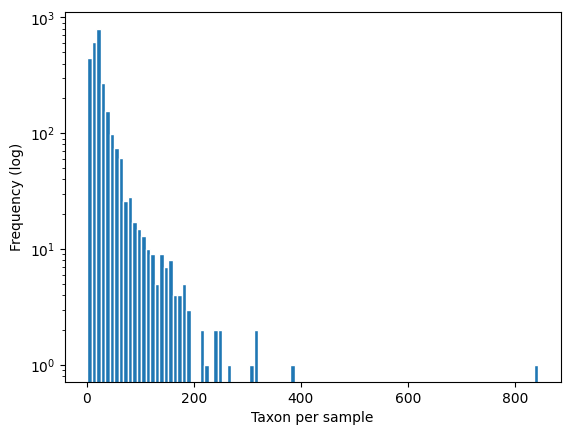

In [6]:
# taxon per Sample
count_taxon_sample = (df_taxon > 0).sum(1).sort_values(ascending=False)
plt.hist(count_taxon_sample.values, edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Taxon per sample')
plt.yscale('log')
plt.show()

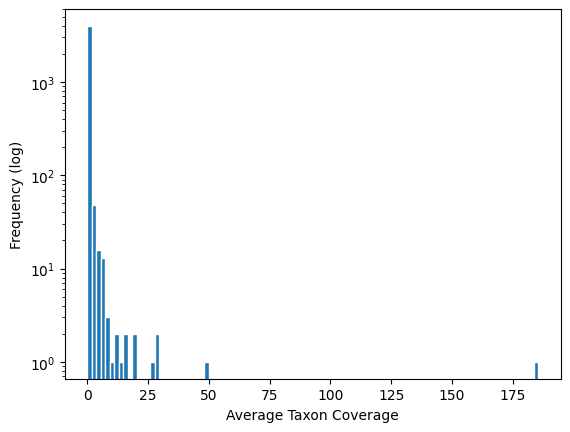

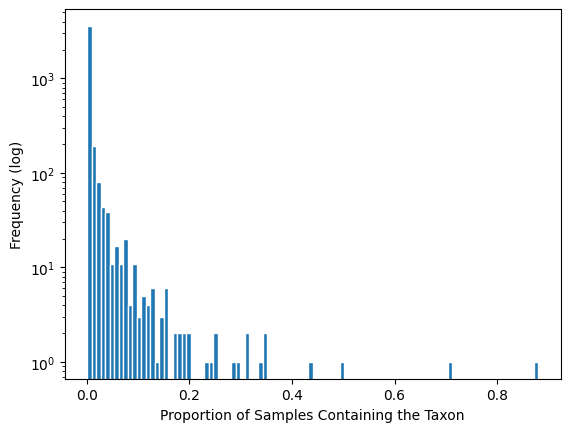

In [7]:
# Average taxon Coverage
sum_taxon_coverage = df_taxon.sum(0).sort_values(ascending=False)
plt.hist(sum_taxon_coverage.values/df_taxon.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Average Taxon Coverage')
plt.yscale('log')
plt.show()

# Average taxon Count
count_taxon = (df_taxon > 0).sum(0).sort_values(ascending=False)
plt.hist(count_taxon.values / df_taxon.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Proportion of Samples Containing the Taxon')
plt.yscale('log')
plt.show()

In [8]:
count_threshold = 200

print(f'# Taxon that appear in less than {count_threshold} samples: {int((count_taxon < count_threshold).sum())}')

# Taxon that appear in less than 200 samples: 3999


# Genes

In [9]:
df_genes = pd.read_parquet('../processed_data/gene_coverage.parquet')
df_genes = df_genes.set_index("Sample")

# force same order 
df_genes.loc[df_taxon.index]

,MGYG000017480_144_1,MGYG000005240.fa_11_12,MGYG000040295_1_1076,MGYG000161889_281_2,MGYG000081795_169_4,MGYG000235258_187_1,MGYG000040295_1_1078,MGYG000287854_166_1,MGYG000081795_71_1,MGYG000178501_217_1,...,MGYG000117193_352_1,MGYG000032708_99_5,MGYG000272348_88_1,MGYG000040295_1_1073,MGYG000174374_194_5,MGYG000005240.fa_11_10,MGYG000063533_28_7,MGYG000178890_63_8,MGYG000005240.fa_11_11,MGYG000272348_88_5
ERR2835298,0.0,0.0,106.948997,0.0,0.0,0.0,0.0,27.917601,0.0,0.0,...,0.0,0.712821,0.0,0.0,2.775000,0.0,0.000000,13.031000,0.0,0.0
SRR12302558,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,2.115540,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.597701,0.0,0.466989,2.476610,0.0,0.0
SRR13622751,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.287180,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
SRR15127829,0.0,0.0,419.569000,0.0,0.0,0.0,0.0,75.233803,0.0,0.0,...,0.0,0.000000,0.0,0.0,19.475000,0.0,0.000000,2.111110,0.0,0.0
SRR12325043,0.0,0.0,148.274994,0.0,0.0,0.0,0.0,1.243780,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,39.839199,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR13774526,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
ERR3053454,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
SRR13774523,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
SRR13774530,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.412281,0.0,0.0


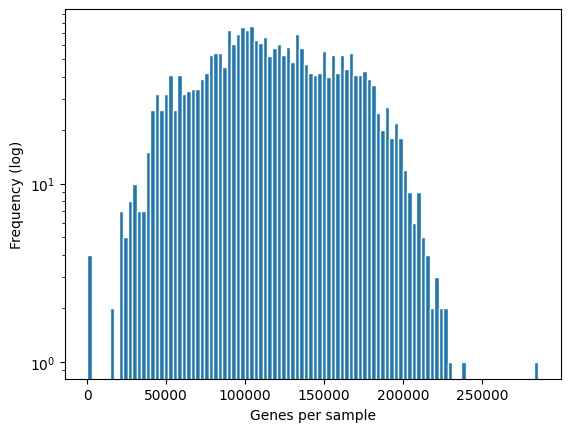

In [10]:
# Genes per Sample
count_genes_sample = (df_genes > 0).sum(1).sort_values(ascending=False)
plt.hist(count_genes_sample.values, edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Genes per sample')
plt.yscale('log')
plt.show()

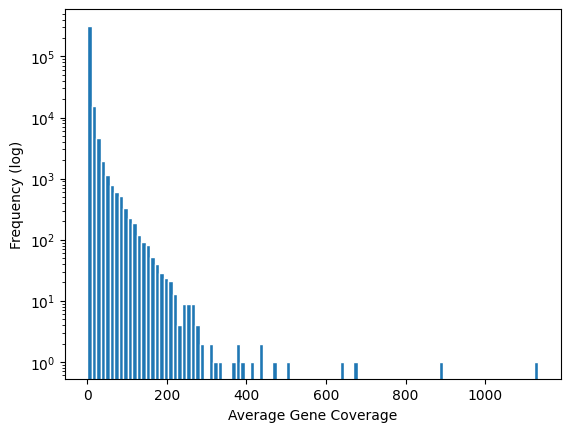

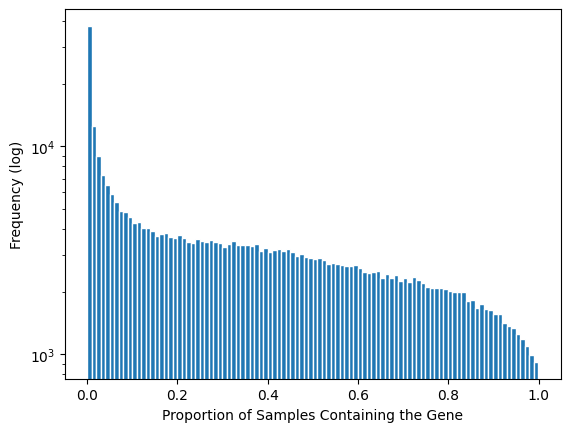

In [11]:
# Average Gene Coverage
sum_gene_coverage = df_genes.sum(0).sort_values(ascending=False)
plt.hist(sum_gene_coverage.values/df_genes.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Average Gene Coverage')
plt.yscale('log')
plt.show()

# Average Gene Count
count_genes = (df_genes > 0).sum(0).sort_values(ascending=False)
plt.hist(count_genes.values / df_genes.shape[0], edgecolor='white', bins=100)
plt.ylabel('Frequency (log)')
plt.xlabel('Proportion of Samples Containing the Gene')
plt.yscale('log')
plt.show()

In [12]:
count_threshold = 200

print(f'# Genes that appear in less than {count_threshold} samples: {int((count_genes < count_threshold).sum())}')

# Genes that appear in less than 200 samples: 86651


# Useless Data

In [13]:
print(f'{(count_genes==0).sum()} genes never show up')
print(f'{(count_taxon==0).sum()} taxon never show up')
print('\n')
print(f'{(df_taxon.sum(1)==0).sum()} samples containt no taxon present')
print(f'{(df_genes.sum(1)==0).sum()} samples containt no taxon present')
print('\n')
print(f'{(count_genes==df_genes.shape[0]).sum()} genes always show up')
print(f'{(count_taxon==df_taxon.shape[0]).sum()} taxon always show up') # bifidus infantis should show up on all samples (and it does!)

6328 genes never show up
0 taxon never show up


0 samples containt no taxon present
0 samples containt no taxon present


0 genes always show up
0 taxon always show up


# Sparsity

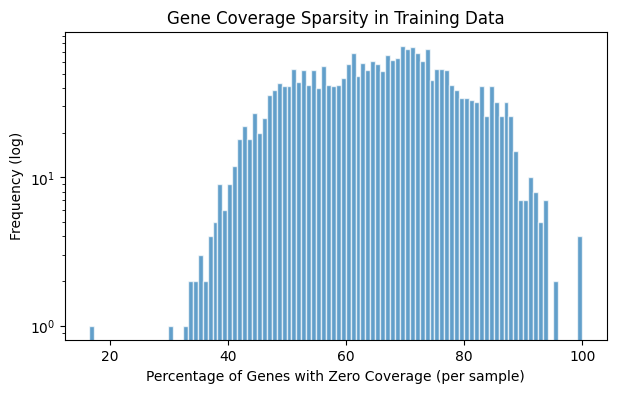

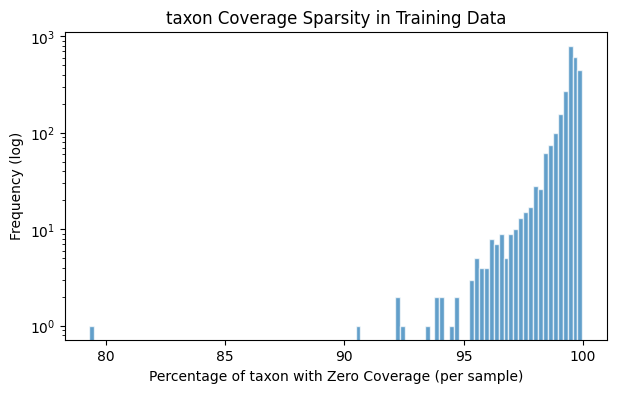

In [14]:
# Gene Sparsity per Sample
gene_sparsity = (df_genes == 0).sum(axis=1) / df_genes.shape[1] * 100

plt.figure(figsize=(7, 4))
plt.hist(gene_sparsity.values, bins=100, edgecolor='white', alpha=0.7)
plt.xlabel("Percentage of Genes with Zero Coverage (per sample)")
plt.ylabel("Frequency (log)")
plt.yscale("log")  # Log scale for better visibility
plt.title("Gene Coverage Sparsity in Training Data")
plt.show()

# taxon Sparsity per Sample
taxon_sparsity = (df_taxon == 0).sum(axis=1) / df_taxon.shape[1] * 100  # Percentage of zero taxon per sample

plt.figure(figsize=(7, 4))
plt.hist(taxon_sparsity.values, bins=100, edgecolor='white', alpha=0.7)
plt.xlabel("Percentage of taxon with Zero Coverage (per sample)")
plt.ylabel("Frequency (log)")
plt.yscale("log")  # Log scale for better visibility
plt.title("taxon Coverage Sparsity in Training Data")
plt.show()

# Core Genes

### Gene Occurrence

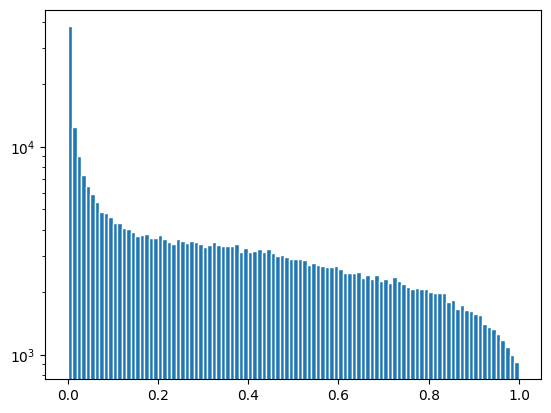

In [15]:
max((df_genes > 0).sum(0))/df_genes.shape[0]

plt.hist((df_genes>0).sum(0)/df_genes.shape[0], bins=100, edgecolor='white')
plt.yscale('log')
plt.show()

### Co-Occurrence (Gene and Taxon)

$$
M_{ij} = \frac{\sum_k S_{ki} G_{kj}}{\min(N_i, N_j)}
$$

where:

$$
S \in \{0,1\}^{n_{\text{samples}} \times n_{\text{taxon}_f}},
$$
$$
G \in \{0,1\}^{n_{\text{samples}} \times n_{\text{genes}_f}}
$$

$$
N_i = \sum_k S_{ki}, \quad N_j = \sum_k G_{kj}
$$


In [16]:
# We'll use a co-occurrence matrix to determine the core genes. 
# For it to be manageable we must remove non statistically significant taxon and genes!

###############################################################################
# 0) Parameters
###############################################################################
threshold = 200  # minimum number of samples in which a gene/taxon must appear

###############################################################################
# 1) Match sample indices
###############################################################################
common_samples = np.intersect1d(df_genes.index.values, df_taxon.index.values)
df_genes_matched = df_genes.loc[common_samples]
df_taxon_matched = df_taxon.loc[common_samples]

###############################################################################
# 2) Apply the per-column presence filter (≥ threshold)
#    - We want to keep only those genes/taxon that appear in at least
#      'threshold' samples.
###############################################################################

# Convert to NumPy arrays
genes_array = df_genes_matched.to_numpy()     # shape (n_samples, n_genes)
taxon_array = df_taxon_matched.to_numpy() # shape (n_samples, n_taxon)

# Boolean arrays where True = present (> 0), False = absent (== 0)
genes_presence = (genes_array > 0)
taxon_presence = (taxon_array > 0)

# Count how many samples have each gene (column) present
gene_nonzero_counts = np.sum(genes_presence, axis=0)  # shape (n_genes,)
# Build mask for columns that appear in >= threshold samples
gene_mask = gene_nonzero_counts >= threshold

# Count how many samples have each taxon (column) present
taxon_nonzero_counts = np.sum(taxon_presence, axis=0)  # shape (n_taxon,)
# Build mask for columns that appear in >= threshold samples
taxon_mask = taxon_nonzero_counts >= threshold

# Filter arrays to keep only those columns
genes_filtered = genes_array[:, gene_mask]       # shape (n_samples, n_genes_f)
taxon_filtered = taxon_array[:, taxon_mask] # shape (n_samples, n_taxon_f)

# Also build the new presence arrays so we can do co-occurrence
genes_presence_f = genes_presence[:, gene_mask]       # shape (n_samples, n_genes_f)
taxon_presence_f = taxon_presence[:, taxon_mask] # shape (n_samples, n_taxon_f)

###############################################################################
# 3) Compute the co-occurrence matrix
#    We want a matrix of shape (n_taxon_f, n_genes_f) with entries:
#       #samples where taxon_i & gene_j both present
#       -------------------------------------------------
#       max(#samples taxon_i present, #samples gene_j present)
###############################################################################

# Count co-occurrences using matrix multiplication:
#   presence_taxon_f: shape (n_samples, n_taxon_f) --> but we need (n_samples, n_taxon_f) * (n_samples, n_genes_f)?
#   Actually we want (n_taxon_f, n_samples) @ (n_samples, n_genes_f) => (n_taxon_f, n_genes_f)
#   So we transpose taxon_presence_f to shape (n_taxon_f, n_samples).

# However, np.dot(...) needs numeric (int/float). We can cast bool->int.
taxon_int = taxon_presence_f.astype(int).T   # shape (n_taxon_f, n_samples)
genes_int = genes_presence_f.astype(int)         # shape (n_samples, n_genes_f)

# co_occurrence_counts[i, j] = sum over samples of (taxon_i_present * gene_j_present)
co_occurrence_counts = np.dot(taxon_int, genes_int)  # shape (n_taxon_f, n_genes_f)

# Next, we need the denominators:
#   denom(i, j) = max(#samples taxon_i present, #samples gene_j present)
# We already have taxon_nonzero_counts and gene_nonzero_counts, but let's
# get them for the *filtered* sets:
taxon_pres_counts_f = np.sum(taxon_presence_f, axis=0)  # shape (n_taxon_f,)
gene_pres_counts_f = np.sum(genes_presence_f, axis=0)       # shape (n_genes_f,)

# For each (i, j), denominator = max(taxon_pres_counts_f[i], gene_pres_counts_f[j]).
# We can do that in a fully vectorized way with np.maximum.outer:
denominator_matrix = np.minimum.outer(taxon_pres_counts_f, gene_pres_counts_f)  
# shape (n_taxon_f, n_genes_f)

# Finally, compute the ratio. Convert to float to avoid integer division:
co_occurrence_matrix = co_occurrence_counts / denominator_matrix

###############################################################################
# 4) Wrap up results
#    co_occurrence_matrix has shape (n_taxon_f, n_genes_f).
#    Optionally, you can build a DataFrame with the filtered names:
###############################################################################
filtered_taxon_names = df_taxon_matched.columns[taxon_mask]
filtered_gene_names = df_genes_matched.columns[gene_mask]

df_co_occurrence = pd.DataFrame(
    co_occurrence_matrix,
    index=filtered_taxon_names,
    columns=filtered_gene_names
)

print("Co-occurrence matrix shape:", df_co_occurrence.shape)

Co-occurrence matrix shape: (77, 255201)


In [17]:
del common_samples, genes_array, taxon_array, genes_presence, taxon_presence, \
    gene_nonzero_counts, taxon_nonzero_counts, gene_mask, taxon_mask, \
    genes_filtered, taxon_filtered, genes_presence_f, taxon_presence_f, \
    taxon_int, genes_int, co_occurrence_counts, taxon_pres_counts_f, \
    gene_pres_counts_f, denominator_matrix, filtered_taxon_names, filtered_gene_names

# Clear RAM

In [18]:
df_co_occurrence.T

,Bifidobacterium longum,Bifidobacterium breve,Bifidobacterium bifidum,Bacteroides fragilis,Phocaeicola vulgatus,Parabacteroides distasonis,Faecalibacterium longum,Faecalibacterium sp900758465,Flavonifractor plautii,Dorea formicigenerans,...,Faecalibacterium duncaniae,Lactobacillus sp944327175,Lactobacillus delbrueckii,Streptococcus mutans,Blautia coccoides,Pseudomonas_E putida,Megasphaera elsdenii,Agathobacter faecis,Bifidobacterium dentium,Anaeroglobus micronuciformis
MGYG000040295_1_1076,0.957884,0.626836,0.630513,0.513189,0.414729,0.228442,0.430052,0.511848,0.293269,0.445378,...,0.096059,0.011494,0.018587,0.014981,0.059561,0.000000,0.099502,0.462882,0.375000,0.385366
MGYG000235258_187_1,0.990361,0.321687,0.251807,0.352518,0.418605,0.611195,0.383420,0.336493,0.549398,0.436975,...,0.773399,0.915709,0.903346,0.906367,0.827586,0.920949,0.721393,0.493450,0.375000,0.317073
MGYG000287854_166_1,0.961342,0.688412,0.746126,0.719424,0.651163,0.402421,0.805699,0.786730,0.465144,0.890756,...,0.322660,0.019157,0.040892,0.037453,0.128527,0.000000,0.139303,0.882096,0.516667,0.497561
MGYG000081795_71_1,0.983412,0.386256,0.286730,0.223022,0.310427,0.270142,0.256477,0.199052,0.338863,0.285714,...,0.145320,0.011494,0.014870,0.022472,0.068966,0.000000,0.019900,0.353712,0.262500,0.170732
MGYG000251915_8_1,0.959677,0.608871,0.508065,0.472422,0.472868,0.307110,0.577720,0.592417,0.360215,0.663866,...,0.211823,0.015326,0.033457,0.029963,0.075235,0.000000,0.119403,0.580786,0.591667,0.492683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGYG000032708_99_5,0.967593,0.350926,0.339690,0.405276,0.451550,0.682300,0.458549,0.478673,0.591346,0.554622,...,0.830049,0.980843,0.973978,0.977528,0.887147,1.000000,0.860697,0.497817,0.458333,0.351220
MGYG000174374_194_5,0.983087,0.533827,0.474374,0.503597,0.459302,0.285930,0.378238,0.388626,0.322115,0.390756,...,0.160099,0.042146,0.048327,0.059925,0.119122,0.031621,0.084577,0.423581,0.458333,0.404878
MGYG000063533_28_7,0.967611,0.619433,0.473684,0.419664,0.403101,0.220877,0.487047,0.545024,0.283401,0.495798,...,0.103448,0.015326,0.014870,0.011236,0.043887,0.000000,0.069652,0.353712,0.250000,0.321951
MGYG000178890_63_8,0.894630,0.679828,0.718713,0.623501,0.687984,0.429652,0.715026,0.696682,0.459135,0.768908,...,0.278325,0.076628,0.085502,0.082397,0.169279,0.051383,0.159204,0.689956,0.608333,0.590244


In [19]:
# Sanity check. Bifidobacterium infantis should have all genes always
# df_co_occurrence.T['Bifidobacterium infantis'].sum() == df_co_occurrence.shape[1]

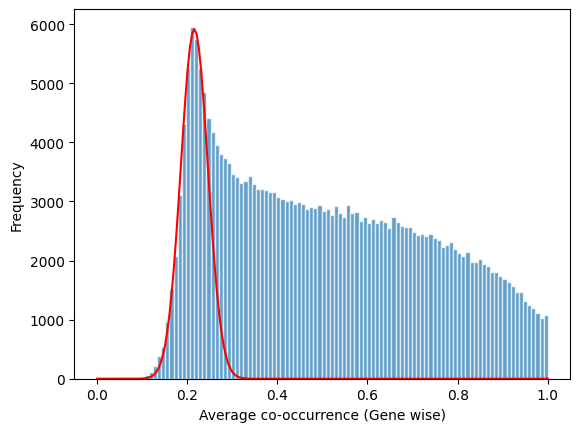

In [20]:
def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

x = np.linspace(0, 1, 200)
plt.plot(x, 445*gaussian(x=x, mu=0.216, sigma=0.03), color='red')

# Co-occurrence sum per gene
sum_co_occ_genes = df_co_occurrence.T.sum(1)/df_co_occurrence.shape[0]
plt.hist(sum_co_occ_genes.values, edgecolor='white', bins=100, alpha=0.7)
plt.ylabel('Frequency')
plt.xlabel('Average co-occurrence (Gene wise)')
#plt.yscale('log')
plt.show()

### Both

In [21]:
occ_genes = ((df_genes>0).sum(0)/df_genes.shape[0]).loc[sum_co_occ_genes.index]

both = sum_co_occ_genes * occ_genes

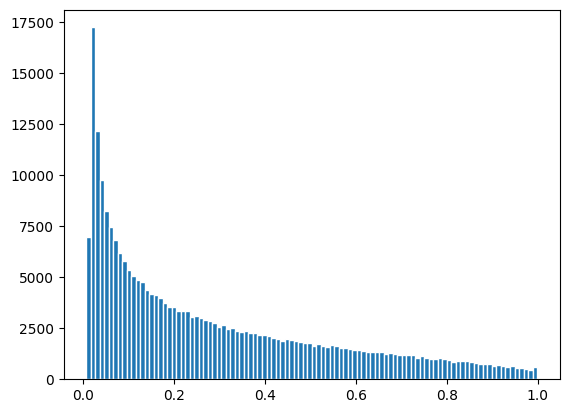

In [22]:
plt.hist(both.sort_values(ascending=False), bins=100, edgecolor='white')
plt.show()

## Relation Between Co-Occurrence and Occurrence

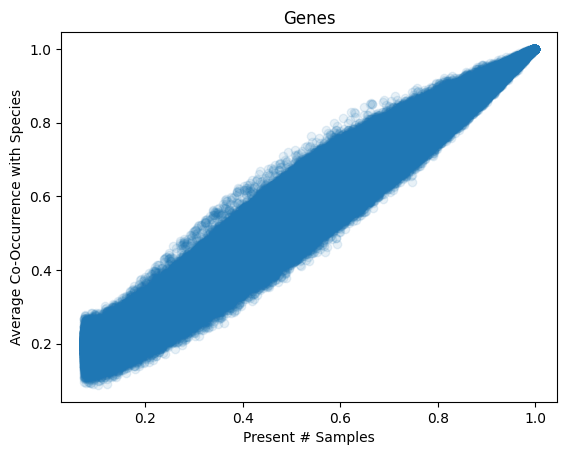

In [23]:
plt.scatter((df_genes.loc[:, (df_genes > 0).sum(0) >= threshold]>0).sum(0)/df_genes.shape[0],
            sum_co_occ_genes,
            alpha=0.1)
plt.xlabel('Present # Samples')
plt.ylabel('Average Co-Occurrence with Species')

plt.title('Genes')

plt.show()

# Samples

## Cosine Similarity

In [24]:
print(f'{int(0.5*df_taxon.shape[0]**2) - df_taxon.shape[0]} Operations')

df_taxon = df_taxon.loc[df_genes.index]
# (df_taxon.index == df_genes.index).sum() == df_taxon.shape[0] # sanity check

3615360 Operations


### Sample-Cluster Centroid

We should check if the cluster similarity from generating the genes has influence on the distance distribution to the centroid

In [25]:
# compute distance distribution
df_taxon_tensor = torch.tensor(df_taxon.values, dtype=torch.float32, device=device)
df_genes_tensor = torch.tensor(df_genes.values, dtype=torch.float32, device=device)

taxon_centroid = df_taxon_tensor.mean(dim=0, keepdim=True)
genes_centroid = df_genes_tensor.mean(dim=0, keepdim=True)

cos_sim_taxon = torch.nn.functional.cosine_similarity(df_taxon_tensor, taxon_centroid, dim=1)
cos_sim_genes = torch.nn.functional.cosine_similarity(df_genes_tensor, genes_centroid, dim=1)

cos_sim_taxon_cpu = cos_sim_taxon.cpu().numpy()
cos_sim_genes_cpu = cos_sim_genes.cpu().numpy()

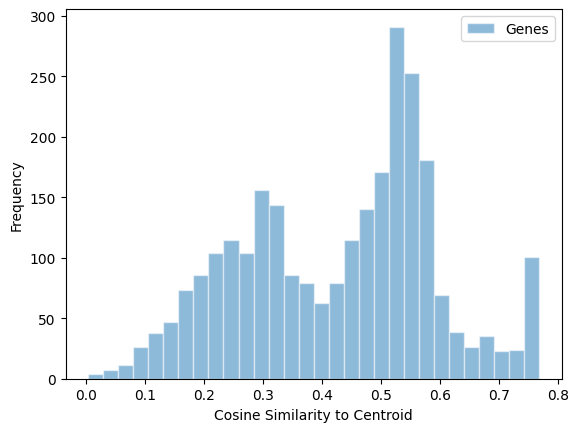

In [26]:
#plt.hist(cos_sim_taxon_cpu, color='C1', label='Taxon', alpha=0.5, edgecolor='white', bins=30)
plt.hist(cos_sim_genes_cpu, color='C0', label='Genes', alpha=0.5, edgecolor='white', bins=30)
plt.xlabel('Cosine Similarity to Centroid')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Sample-Sample

In [27]:
threshold = None

if threshold: # makes no difference for cosine similarity plot
    df_taxon = df_taxon.loc[:, count_taxon >= threshold]
    df_genes = df_genes.loc[:, count_genes >= threshold]

# taxon similarity
print('Generating taxon similarity matrix...')
taxon_cosine_sim_matrix = pd.DataFrame(
    cosine_similarity(df_taxon), 
    index=df_taxon.index,
    columns=df_taxon.index
)

# genes similarity
print('Generating genes similarity matrix...')
genes_cosine_sim_matrix = pd.DataFrame(
    cosine_similarity(df_genes),
    index=df_genes.index,
    columns=df_genes.index
)

Generating taxon similarity matrix...
Generating genes similarity matrix...


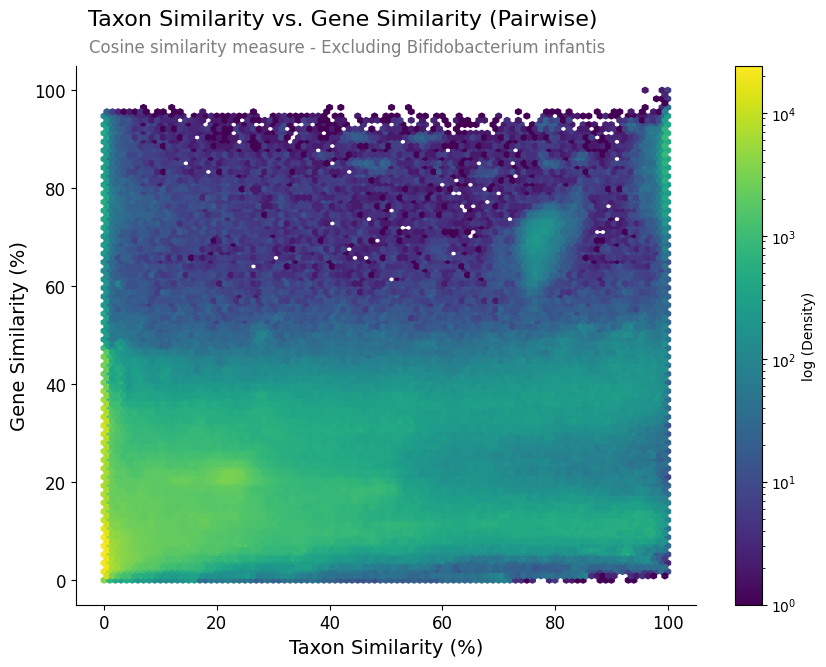

In [28]:
# Extract upper triangle values (excluding diagonal)
taxon_vals = taxon_cosine_sim_matrix.where(np.triu(np.ones(taxon_cosine_sim_matrix.shape), k=1).astype(bool)).stack()
genes_vals = genes_cosine_sim_matrix.where(np.triu(np.ones(genes_cosine_sim_matrix.shape), k=1).astype(bool)).stack()

plt.figure(figsize=(10, 7))
hb = plt.hexbin(
    taxon_vals * 100, genes_vals * 100, gridsize=100, cmap='viridis', bins='log'
)

cb = plt.colorbar(label='log (Density)')

plt.xlabel('Taxon Similarity (%)', fontsize=14)
plt.ylabel('Gene Similarity (%)', fontsize=14)
plt.title('Taxon Similarity vs. Gene Similarity (Pairwise)', fontsize=16, x=0.43, y=1.06)
plt.suptitle('Cosine similarity measure - Excluding Bifidobacterium infantis', fontsize=12, color='gray', x=0.396, y=0.92)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

## Similarity as Taxon granularity decreases

Generating taxon similarity matrix...


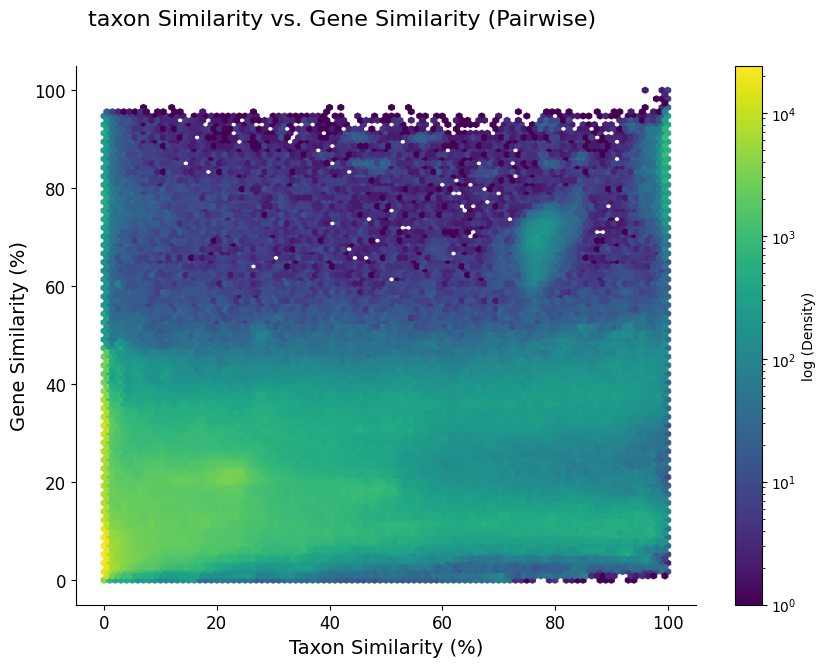

Generating taxon similarity matrix...


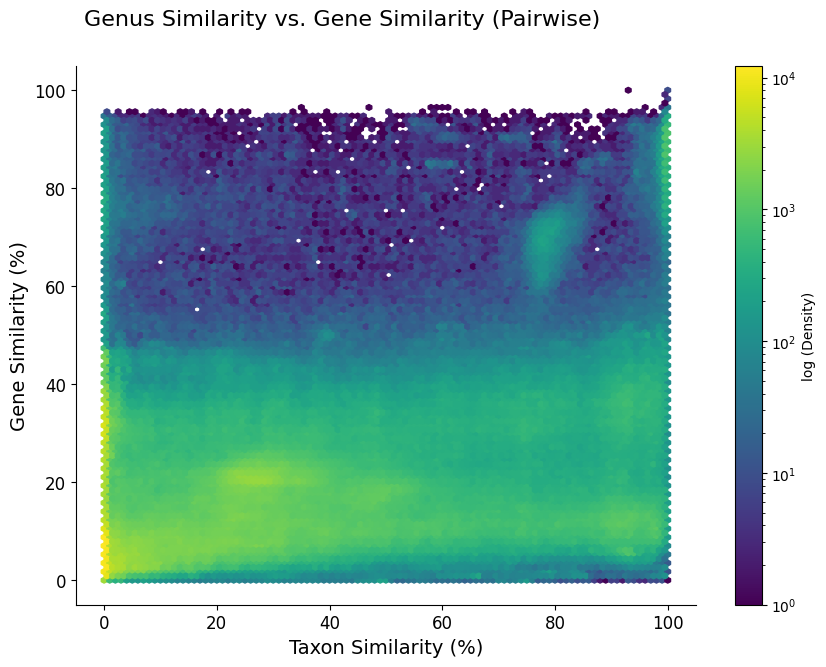

Generating taxon similarity matrix...


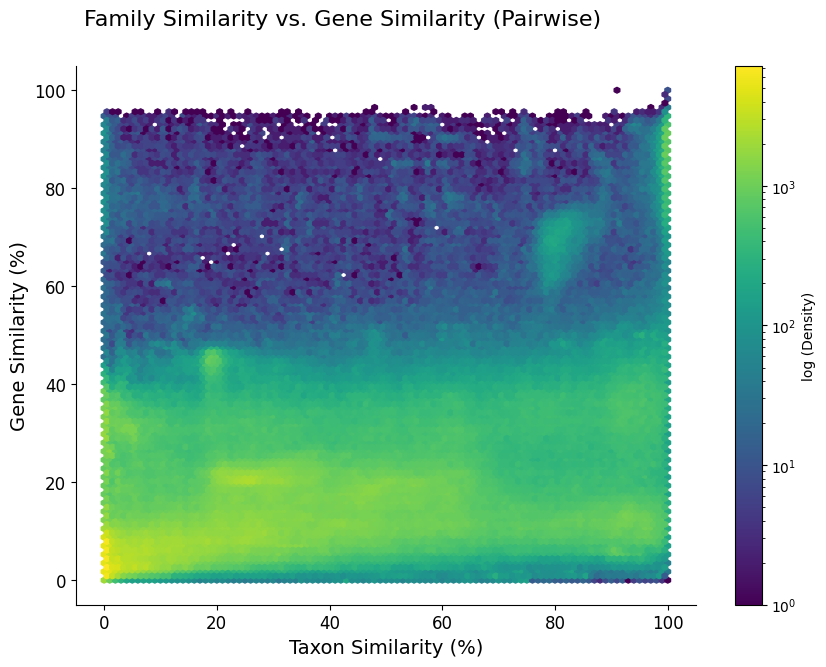

Generating taxon similarity matrix...


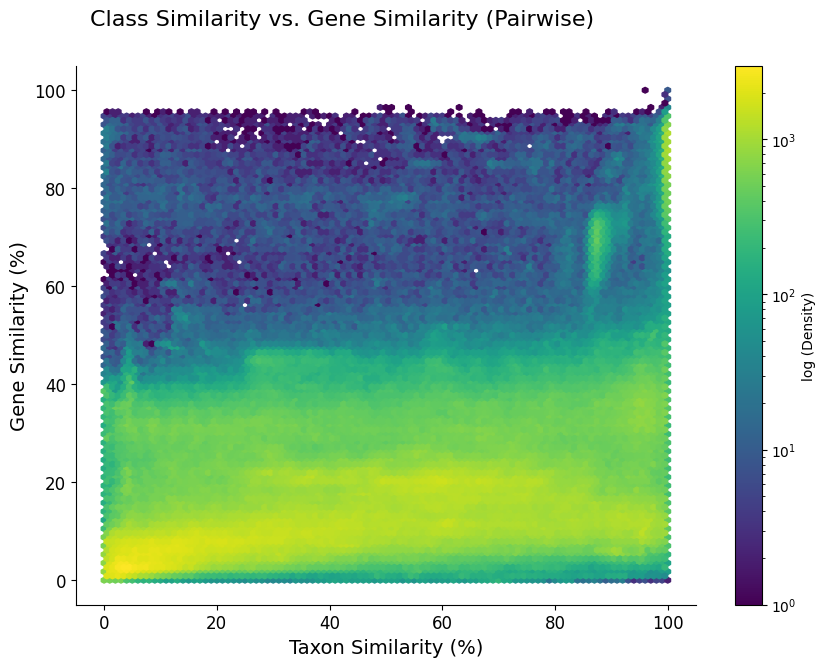

Generating taxon similarity matrix...


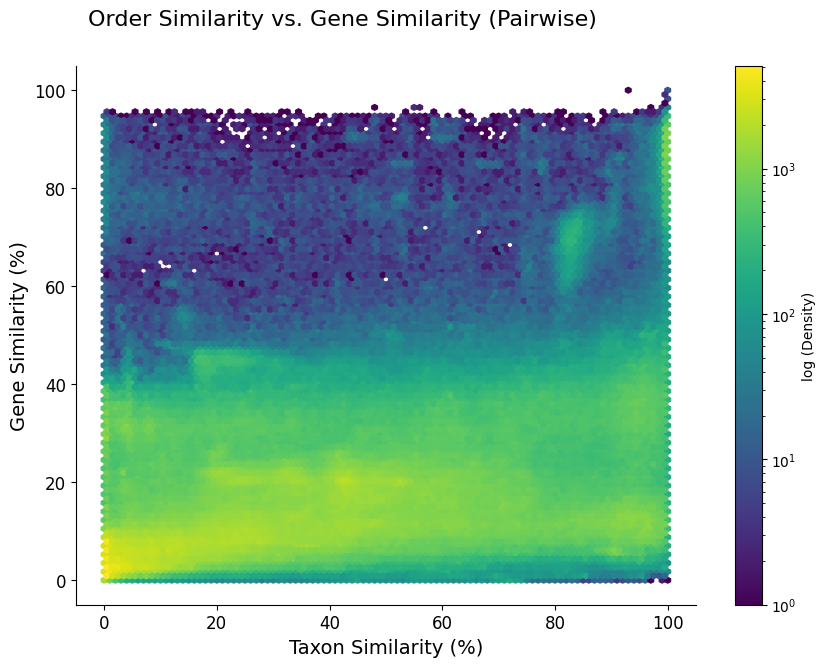

Generating taxon similarity matrix...


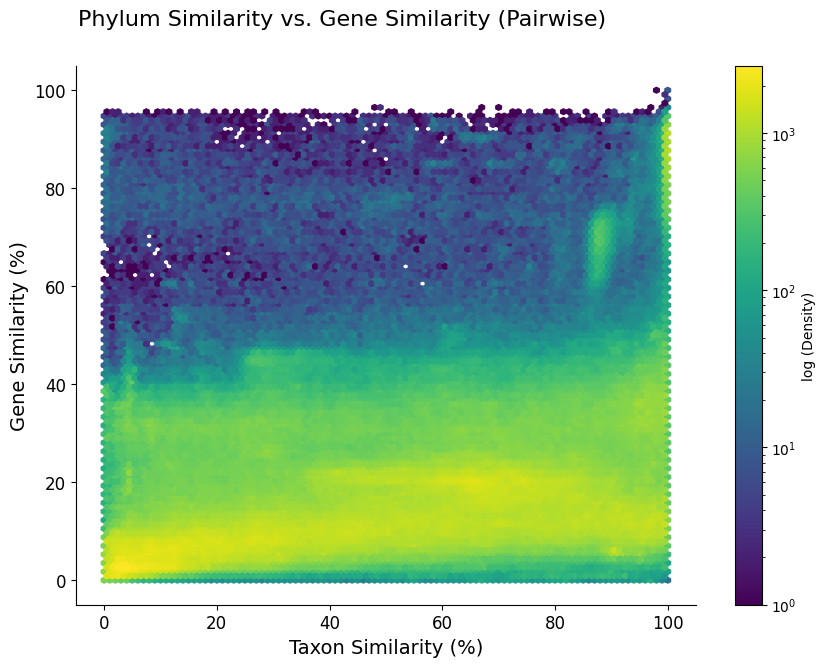

In [29]:
taxons = ['s', 'g', 'f', 'c', 'o', 'p']

taxon_name = {'s': 'taxon',
              'g': 'Genus',
              'f': 'Family',
              'o': 'Order',
              'c': 'Class',
              'p': 'Phylum'}

for taxon in taxons:
    df_taxon = pd.read_parquet(f'../processed_data/taxon_coverage_{taxon}.parquet')
    df_taxon = df_taxon.loc[df_genes.index]

    # taxon similarity
    print('Generating taxon similarity matrix...')
    taxon_cosine_sim_matrix = pd.DataFrame(
    cosine_similarity(df_taxon), 
    index=df_taxon.index,
    columns=df_taxon.index
)
    # Extract upper triangle values (excluding diagonal)
    taxon_vals = taxon_cosine_sim_matrix.where(np.triu(np.ones(taxon_cosine_sim_matrix.shape), k=1).astype(bool)).stack()
    genes_vals = genes_cosine_sim_matrix.where(np.triu(np.ones(genes_cosine_sim_matrix.shape), k=1).astype(bool)).stack()
    
    plt.figure(figsize=(10, 7))
    hb = plt.hexbin(
        taxon_vals * 100, genes_vals * 100, gridsize=100, cmap='viridis', bins='log'
    )
    
    cb = plt.colorbar(label='log (Density)')
    
    plt.xlabel('Taxon Similarity (%)', fontsize=14)
    plt.ylabel('Gene Similarity (%)', fontsize=14)
    plt.title(f'{taxon_name[taxon]} Similarity vs. Gene Similarity (Pairwise)', fontsize=16, x=0.43, y=1.06)
    # plt.suptitle('Cosine similarity measure - Excluding Bifidobacterium infantis', fontsize=12, color='gray', x=0.396, y=0.92)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

    plt.savefig(f'plots/{taxon_name[taxon]}.png')
    
    plt.show()

### Generating uniform random Taxon

In [30]:
print('Generating uniform random taxon similarity matrix...')
taxon_cosine_sim_matrix = pd.DataFrame(
    np.random.uniform(low=0, high=1, size=(len(df_taxon), len(df_taxon))),
    index=df_taxon.index,
    columns=df_taxon.index
)

taxon_cosine_sim_matrix = (taxon_cosine_sim_matrix + taxon_cosine_sim_matrix.T) / 2
np.fill_diagonal(taxon_cosine_sim_matrix.values, 1.0)

Generating uniform random taxon similarity matrix...


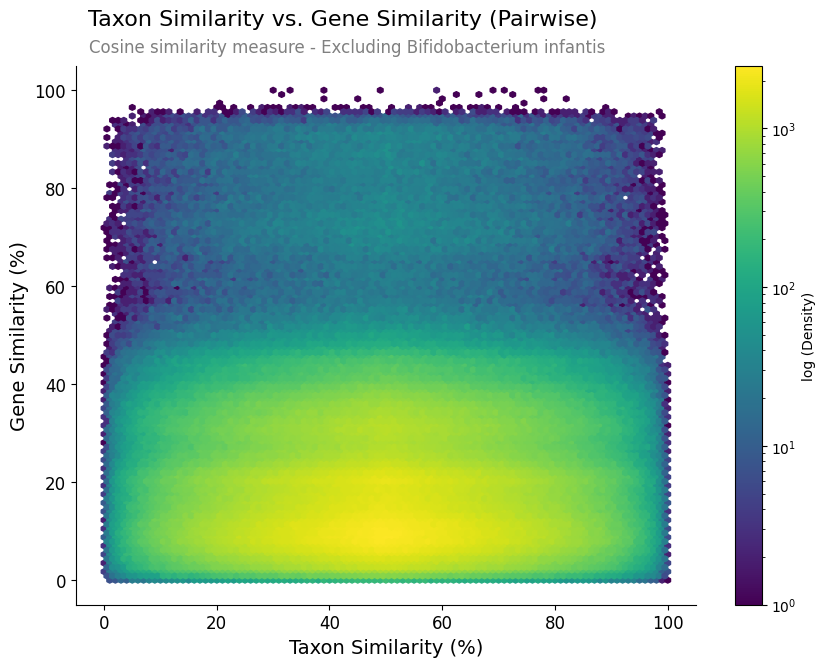

In [31]:
# Extract upper triangle values (excluding diagonal)
taxon_vals = taxon_cosine_sim_matrix.where(np.triu(np.ones(taxon_cosine_sim_matrix.shape), k=1).astype(bool)).stack()
genes_vals = genes_cosine_sim_matrix.where(np.triu(np.ones(genes_cosine_sim_matrix.shape), k=1).astype(bool)).stack()

plt.figure(figsize=(10, 7))
hb = plt.hexbin(
    taxon_vals * 100, genes_vals * 100, gridsize=100, cmap='viridis', bins='log'
)

cb = plt.colorbar(label='log (Density)')

plt.xlabel('Taxon Similarity (%)', fontsize=14)
plt.ylabel('Gene Similarity (%)', fontsize=14)
plt.title('Taxon Similarity vs. Gene Similarity (Pairwise)', fontsize=16, x=0.43, y=1.06)
plt.suptitle('Cosine similarity measure - Excluding Bifidobacterium infantis', fontsize=12, color='gray', x=0.396, y=0.92)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

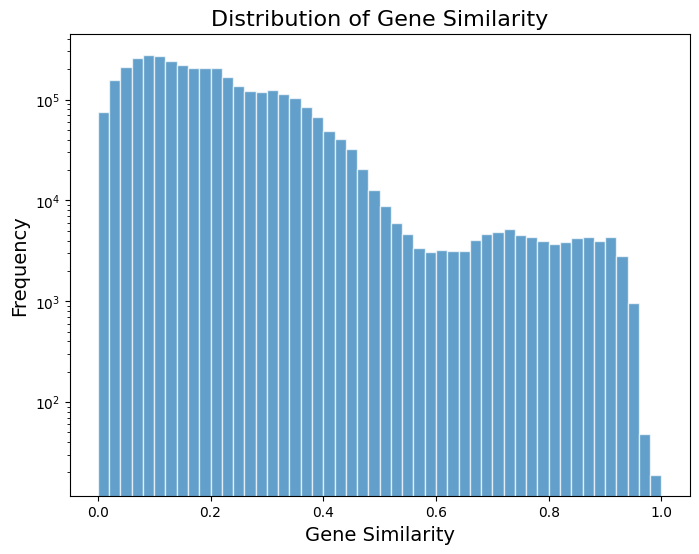

In [32]:
plt.figure(figsize=(8, 6))
plt.hist(genes_vals, bins=50, alpha=0.7, edgecolor='white')

plt.xlabel('Gene Similarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Gene Similarity', fontsize=16)

plt.yscale('log')

plt.show()

Generating taxon similarity matrix...


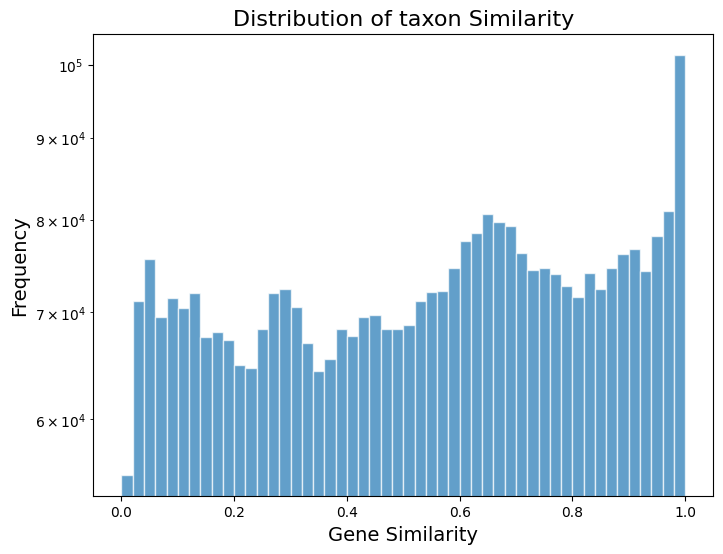

In [33]:
# taxon similarity
print('Generating taxon similarity matrix...')
taxon_cosine_sim_matrix = pd.DataFrame(
    cosine_similarity(df_taxon), 
    index=df_taxon.index,
    columns=df_taxon.index
)

taxon_vals = taxon_cosine_sim_matrix.where(np.triu(np.ones(taxon_cosine_sim_matrix.shape), k=1).astype(bool)).stack()

plt.figure(figsize=(8, 6))
plt.hist(taxon_vals, bins=50, alpha=0.7, edgecolor='white')

plt.xlabel('Gene Similarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of taxon Similarity', fontsize=16)

plt.yscale('log')

plt.show()

# Mutual Information (Are the variables independent)

In [34]:
mi = mutual_info_regression(taxon_vals.values.reshape(-1, 1), genes_vals.values)[0] # not simmetric

print("Mutual Information:", mi)

Mutual Information: 0.10458565217592852


In [35]:
'''
Mutual Information (MI) as Conditional Entropy:

MI(X, Y) = H(X) - H(X | Y)

Where:
- H(X) = -∫ p(X) log p(X) dX  # Entropy of gene similarity (X)
- H(X | Y) = -∫∫ p(X, Y) log p(X | Y) dX dY  # Conditional entropy of X given Y

X = genes_vals_filtered.values  # Gene similarity values (continuous random variable)
Y = taxon_vals.values.reshape(-1, 1)  # Taxon similarity values (continuous random variable)
'''

'\nMutual Information (MI) as Conditional Entropy:\n\nMI(X, Y) = H(X) - H(X | Y)\n\nWhere:\n- H(X) = -∫ p(X) log p(X) dX  # Entropy of gene similarity (X)\n- H(X | Y) = -∫∫ p(X, Y) log p(X | Y) dX dY  # Conditional entropy of X given Y\n\nX = genes_vals_filtered.values  # Gene similarity values (continuous random variable)\nY = taxon_vals.values.reshape(-1, 1)  # Taxon similarity values (continuous random variable)\n'

Processing threshold: 1.0 ...
removed 0 genes.
Mutual Information at threshold 1.0: 0.10458564805574522
Processing threshold: 0.9689655172413794 ...
removed 3012 genes.
Mutual Information at threshold 0.9689655172413794: 0.09914289630580342
Processing threshold: 0.9379310344827586 ...
removed 6883 genes.
Mutual Information at threshold 0.9379310344827586: 0.09688131169368752
Processing threshold: 0.906896551724138 ...
removed 11510 genes.
Mutual Information at threshold 0.906896551724138: 0.09822440249568132
Processing threshold: 0.8758620689655172 ...
removed 16498 genes.
Mutual Information at threshold 0.8758620689655172: 0.10018113783853089
Processing threshold: 0.8448275862068966 ...
removed 21937 genes.
Mutual Information at threshold 0.8448275862068966: 0.10138268117746385
Processing threshold: 0.8137931034482759 ...
removed 28025 genes.
Mutual Information at threshold 0.8137931034482759: 0.10139653370600499
Processing threshold: 0.7827586206896552 ...
removed 34349 genes.
Mutual

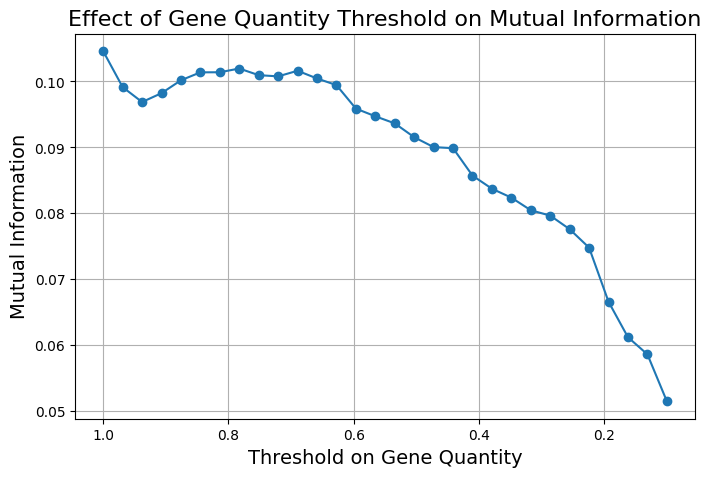

In [36]:
# Define the thresholds
thresholds = np.linspace(1, 0.1, 30)

df_gene_counts = (df_genes>0).sum(0)/df_genes.shape[0]

# Store results
mi_values = []

for threshold in thresholds:
    print(f"Processing threshold: {threshold} ...")

    # Step 1: Filter genes (columns) based on the threshold
    filtered_genes = df_gene_counts[df_gene_counts <= threshold].index  # Genes to keep
    df_genes_filtered = df_genes.loc[:, filtered_genes]  # Keep all samples, only selected genes

    print(f'removed {int(df_genes.shape[1] - len(filtered_genes))} genes.')

    # Step 2: Compute new gene similarity matrix (samples x samples)
    genes_cosine_sim_matrix = pd.DataFrame(
        cosine_similarity(df_genes_filtered),
        index=df_genes.index,  # Keep sample index
        columns=df_genes.index # Keep sample index
    )

    # Step 3: Extract upper triangle values (excluding diagonal)
    genes_vals_filtered = genes_cosine_sim_matrix.where(
        np.triu(np.ones(genes_cosine_sim_matrix.shape), k=1).astype(bool)
    ).stack()

    # Step 4: Compute Mutual Information
    mi = mutual_info_regression(taxon_vals.values.reshape(-1, 1), genes_vals_filtered.values)[0]
    mi_values.append(mi)

    print(f"Mutual Information at threshold {threshold}: {mi}")

# Step 5: Plot MI vs. Threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, mi_values, marker='o', linestyle='-')
plt.xlabel("Threshold on Gene Quantity", fontsize=14)
plt.ylabel("Mutual Information", fontsize=14)
plt.title("Effect of Gene Quantity Threshold on Mutual Information", fontsize=16)
plt.gca().invert_xaxis()  # Higher thresholds mean fewer genes, so flip x-axis for clarity
plt.grid(True)
plt.show()

In [37]:
# Se calhar posso olhar para as quebras. 
# Onde há maiores quebras quer dizer que os genes remomvidos são oos que estão mais relacionados com as espécies presentes???








In [38]:
# Sanity Check
test = pd.DataFrame({'G1': [1, 0, 1], 'G2': [0, 1, 1], 'G3':[0, 0, 1]})
test.index = ['S1', 'S2', 'S3']

print(test)
print('\n----------\n')

sim_matrix = pd.DataFrame(cosine_similarity(test))

print(sim_matrix.where(np.triu(np.ones(sim_matrix.shape), k=1).astype(bool)).stack())

    G1  G2  G3
S1   1   0   0
S2   0   1   0
S3   1   1   1

----------

0  1    0.00000
   2    0.57735
1  2    0.57735
dtype: float64


# Dimentionality Reduction